# 7.7 Larry|  Estimate the CDF F(x) - Fiji Earthquakes data

In [4]:
import urllib
import requests
import matplotlib.pyplot as plt
import pandas as pd
url = "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/fijiquakes.dat"
response = requests.get(url, verify=False)

C:\Users\dskcy\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.stat.cmu.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [9]:
response.text.split('\n')

['Obs.    lat   long depth mag stations',
 '1    -20.42 181.62   562 4.8       41',
 '2    -20.62 181.03   650 4.2       15',
 '3    -26.00 184.10    42 5.4       43',
 '4    -17.97 181.66   626 4.1       19',
 '5    -20.42 181.96   649 4.0       11',
 '6    -19.68 184.31   195 4.0       12',
 '7    -11.70 166.10    82 4.8       43',
 '8    -28.11 181.93   194 4.4       15',
 '9    -28.74 181.74   211 4.7       35',
 '10   -17.47 179.59   622 4.3       19',
 '11   -21.44 180.69   583 4.4       13',
 '12   -12.26 167.00   249 4.6       16',
 '13   -18.54 182.11   554 4.4       19',
 '14   -21.00 181.66   600 4.4       10',
 '15   -20.70 169.92   139 6.1       94',
 '16   -15.94 184.95   306 4.3       11',
 '17   -13.64 165.96    50 6.0       83',
 '18   -17.83 181.50   590 4.5       21',
 '19   -23.50 179.78   570 4.4       13',
 '20   -22.63 180.31   598 4.4       18',
 '21   -20.84 181.16   576 4.5       17',
 '22   -10.98 166.32   211 4.2       12',
 '23   -23.30 180.16   512 4.4    

In [14]:
response.text.split('\n')[0].split(' ')

['Obs.', '', '', '', 'lat', '', '', 'long', 'depth', 'mag', 'stations']

In [37]:
lists = []
for i in range(len(response.text.split('\n'))):
    list = response.text.split('\n')[i].split(' ')
    list = [ele for ele in list if ele!='']
    lists.append(list)

In [38]:
df = pd.DataFrame(lists[1:-1])

In [39]:
df.columns = lists[0]

In [40]:
df

,Obs.,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...,...
995,996,-25.93,179.54,470,4.4,22
996,997,-12.28,167.06,248,4.7,35
997,998,-20.13,184.20,244,4.5,34
998,999,-17.40,187.80,40,4.5,14


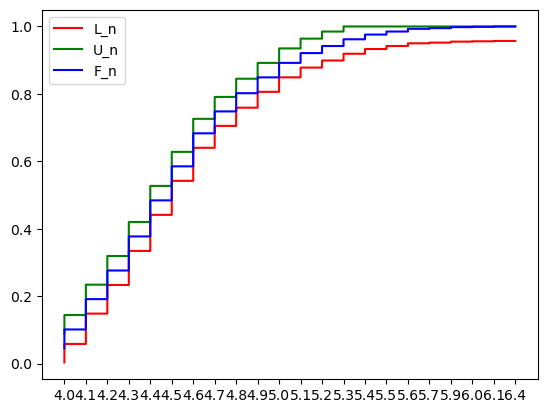

In [50]:
import math
r = np.array(df.mag)
n = len(r)
alpha = 0.05
epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

# Empirical CDF
F_n = lambda x : sum(r <= x) / n
L_n = lambda x : max(F_n(x) - epsilon, 0)
U_n = lambda x : min(F_n(x) + epsilon, 1)

xx = sorted(r)

data = pd.DataFrame({
    'x': xx, 
    'F_n': np.array(map(F_n, xx)), 
    'U_n': np.array(map(U_n, xx)), 
    'L_n': np.array(map(L_n, xx))
})

plt.step( 'x', 'L_n', data=data, color='red')
plt.step( 'x', 'U_n', data=data, color='green')
plt.step( 'x', 'F_n', data=data, color='blue')
plt.legend();


In [70]:
# F(4.9) - F(4.3)
data.x = data.x.astype(float)
data_filtered = data[(data.x == 4.9) | (data.x == 4.3)]

In [71]:
data_filtered

,x,F_n,U_n,L_n
191,4.3,0.276,0.318947,0.233053
192,4.3,0.276,0.318947,0.233053
193,4.3,0.276,0.318947,0.233053
194,4.3,0.276,0.318947,0.233053
195,4.3,0.276,0.318947,0.233053
...,...,...,...,...
797,4.9,0.802,0.844947,0.759053
798,4.9,0.802,0.844947,0.759053
799,4.9,0.802,0.844947,0.759053
800,4.9,0.802,0.844947,0.759053


In [74]:
print('Confidence interval of F(4.9) - F(4.3) is ({}, {})'.format(0.759053 - 0.318947, 0.844947 - 0.233053))

Confidence interval of F(4.9) - F(4.3) is (0.440106, 0.6118939999999999)


In [2]:
import numpy as np
indian_males_shoesizes_sample = np.array([8.6, 7.4, 9.1, 11.3, 8.4, 8.4, 11.5, 9.5, 7.0, 8.7,
 7.0, 7.0, 8.1, 5.8, 6.3, 7.6, 6.8, 8.3, 7.0, 6.3,
 10.8, 8.4, 8.8, 6.3, 7.6, 8.2, 6.7, 8.3, 7.6, 8.0,
 7.6, 11.6, 8.5, 6.5, 9.3, 6.5, 8.5, 5.8, 6.3, 8.2,
 9.5, 8.4, 7.4, 8.2, 6.2, 7.7, 7.0, 9.9, 8.3, 6.3,
 8.2, 7.5, 7.2, 9.1, 9.8, 9.5, 7.0, 7.8, 8.5, 9.6,
 7.5, 7.7, 6.8, 6.7, 9.1, 10.7, 8.1, 9.7, 8.6, 7.2,
 8.6, 10.9, 8.1, 10.8, 4.4, 9.3, 8.6, 7.9, 8.6, 5.4,
 8.2, 8.6, 10.8, 7.7, 7.0, 7.9, 9.5, 8.5, 7.6, 8.7,
 8.3, 9.6, 7.1, 7.8, 7.5, 6.1, 8.4, 8.7, 8.4, 8.0]
)

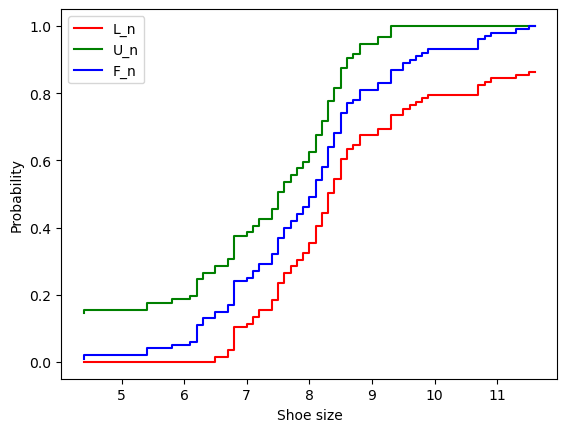

In [7]:
import math
r = indian_males_shoesizes_sample
n = len(r)
alpha = 0.05
epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

# Empirical CDF
F_n = lambda x : sum(r <= x) / n
L_n = lambda x : max(F_n(x) - epsilon, 0)
U_n = lambda x : min(F_n(x) + epsilon, 1)

xx = sorted(r)

data = pd.DataFrame({
    'x': xx, 
    'F_n': np.array(map(F_n, xx)), 
    'U_n': np.array(map(U_n, xx)), 
    'L_n': np.array(map(L_n, xx))
})

plt.step( 'x', 'L_n', data=data, color='red')
plt.step( 'x', 'U_n', data=data, color='green')
plt.step( 'x', 'F_n', data=data, color='blue')
plt.xlabel('Shoe size')
plt.ylabel('Probability')
plt.legend();

In [13]:
data.x = data.x.astype(float)
data_filtered = data[(data.x == 11.5) | (data.x == 10.7)]
data_filtered

,x,F_n,U_n,L_n
92,10.7,0.93,1,0.79419
98,11.5,0.99,1,0.85419


In [14]:
0.06*100000

6000.0